In [35]:
# PART 1

import numpy as np
import matplotlib.pyplot as plt

# Define the grid environment
grid_size = (5, 5)
start_state = (4, 0)
terminal_states = [(0, 0), (0, 4)]
red_states = [(2, 0), (2, 1), (2, 3), (2, 4)]
actions = ['up', 'down', 'left', 'right']
Q_sarsa = np.zeros((grid_size[0], grid_size[1], len(actions)))
Q_qlearning = np.zeros((grid_size[0], grid_size[1], len(actions)))

def step(state, action):
    x, y = state

    # Default next_state is the same as the current state
    next_state = state

    if action == 'up':
        next_state = (max(x - 1, 0), y)
    elif action == 'down':
        next_state = (min(x + 1, grid_size[0] - 1), y)
    elif action == 'left':
        next_state = (x, max(y - 1, 0))
    elif action == 'right':
        next_state = (x, min(y + 1, grid_size[1] - 1))
    else:
        raise ValueError(f"Invalid action: {action}")  # Error handling for unexpected actions

    # Define the reward
    reward = -1
    if next_state in red_states:
        reward = -20
        next_state = start_state
    elif next_state in terminal_states:
        reward = 0

    return next_state, reward

# Check if the state is terminal
def is_terminal(state):
    return state in terminal_states

# Function to choose an action based on epsilon-greedy policy
def choose_action(state, Q, epsilon=0.1):
    if np.random.rand() < epsilon:
        return np.random.choice(len(actions))
    else:
        return np.argmax(Q[state[0], state[1]])

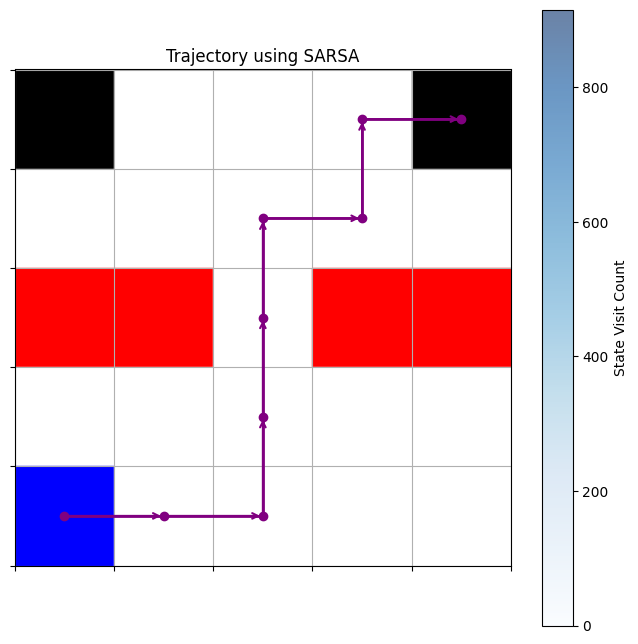

In [36]:
# SARSA Algorithm
Q = np.zeros((grid_size[0], grid_size[1], len(actions)))

# SARSA Algorithm
def sarsa(Q, episodes=500, alpha=0.1, gamma=0.9, epsilon=0.1):
    for _ in range(episodes):
        state = start_state
        action = choose_action(state, Q, epsilon)
        while not is_terminal(state):
            next_state, reward = step(state, actions[action])
            next_action = choose_action(next_state, Q, epsilon)
            Q[state[0], state[1], action] += alpha * (
                reward + gamma * Q[next_state[0], next_state[1], next_action] - Q[state[0], state[1], action])
            state, action = next_state, next_action
    return Q


def plot_sarsa_trajectory(Q, trajectory, visit_counts):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(-0.5, grid_size[1] - 0.5)
    ax.set_ylim(-0.5, grid_size[0] - 0.5)
    ax.set_xticks(np.arange(-0.5, grid_size[1], 1))
    ax.set_yticks(np.arange(-0.5, grid_size[0], 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.invert_yaxis()

    # Plot a heatmap of visit counts
    heatmap = ax.imshow(visit_counts, cmap='Blues', interpolation='nearest', alpha=0.6)

    # Color the states
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if (x, y) in red_states:
                ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='red'))
            elif (x, y) in terminal_states:
                ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='black'))
            elif (x, y) == start_state:
                ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='blue'))
            else:
                ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='white'))

    # Plot the trajectory with arrows
    xs, ys = zip(*[(s[1], s[0]) for s in trajectory])
    ax.plot(xs, ys, marker='o', color='purple', linewidth=2)

    for i in range(len(xs) - 1):
        ax.annotate('', xy=(xs[i + 1], ys[i + 1]), xytext=(xs[i], ys[i]),
                    arrowprops=dict(arrowstyle="->", color='purple', lw=1.5))

    # Add a color bar for the heatmap
    cbar = plt.colorbar(heatmap, ax=ax)
    cbar.set_label('State Visit Count')

    plt.title('Trajectory using SARSA')
    plt.show()

# Update SARSA training to track state visits
def sarsa_with_visits(Q, episodes=500, alpha=0.1, gamma=0.9, epsilon=0.1):
    visit_counts = np.zeros(grid_size)
    for _ in range(episodes):
        state = start_state
        action = choose_action(state, Q, epsilon)
        while not is_terminal(state):
            next_state, reward = step(state, actions[action])
            next_action = choose_action(next_state, Q, epsilon)
            Q[state[0], state[1], action] += alpha * (
                reward + gamma * Q[next_state[0], next_state[1], next_action] - Q[state[0], state[1], action])
            visit_counts[state[0], state[1]] += 1
            state, action = next_state, next_action
    return Q, visit_counts

# Train Q-table using SARSA with visit tracking
Q_sarsa, visit_counts = sarsa_with_visits(Q_sarsa)

# Plot the trajectory using SARSA
trajectory = []
state = start_state
trajectory.append(state)

while not is_terminal(state):
    action = np.argmax(Q_sarsa[state[0], state[1]])
    state, _ = step(state, actions[action])
    trajectory.append(state)
    if state in terminal_states:
        break

plot_sarsa_trajectory(Q_sarsa, trajectory, visit_counts)

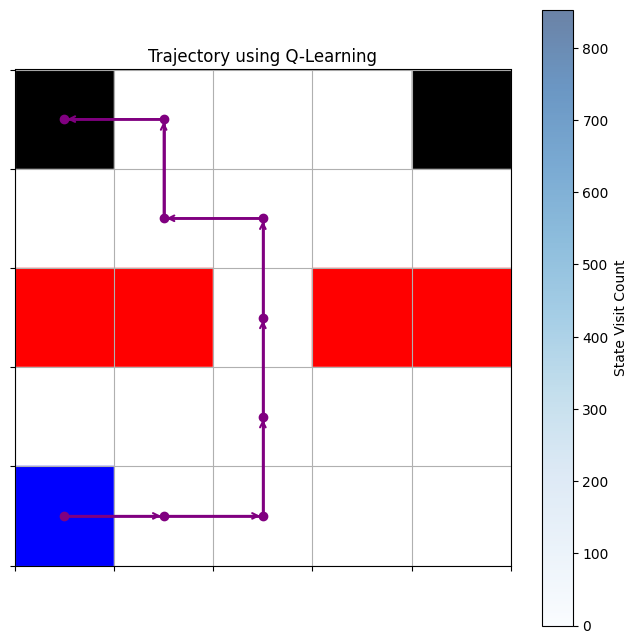

In [37]:
# Initialize Q-table
Q = np.zeros((grid_size[0], grid_size[1], len(actions)))

# Q-Learning Algorithm
def q_learning(Q, episodes=500, alpha=0.1, gamma=0.9, epsilon=0.1):
    for _ in range(episodes):
        state = start_state
        while not is_terminal(state):
            action = choose_action(state, Q, epsilon)
            next_state, reward = step(state, actions[action])
            best_next_action = np.argmax(Q[next_state[0], next_state[1]])
            Q[state[0], state[1], action] += alpha * (
                reward + gamma * Q[next_state[0], next_state[1], best_next_action] - Q[state[0], state[1], action])
            state = next_state
    return Q

import matplotlib.pyplot as plt
import numpy as np

def plot_qlearning_trajectory(Q, trajectory, visit_counts):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(-0.5, grid_size[1] - 0.5)
    ax.set_ylim(-0.5, grid_size[0] - 0.5)
    ax.set_xticks(np.arange(-0.5, grid_size[1], 1))
    ax.set_yticks(np.arange(-0.5, grid_size[0], 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.invert_yaxis()

    # Plot a heatmap of visit counts
    heatmap = ax.imshow(visit_counts, cmap='Blues', interpolation='nearest', alpha=0.6)

    # Color the states
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if (x, y) in red_states:
                ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='red'))
            elif (x, y) in terminal_states:
                ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='black'))
            elif (x, y) == start_state:
                ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='blue'))
            else:
                ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='white'))

    # Plot the trajectory with arrows
    xs, ys = zip(*[(s[1], s[0]) for s in trajectory])
    ax.plot(xs, ys, marker='o', color='purple', linewidth=2)

    for i in range(len(xs) - 1):
        ax.annotate('', xy=(xs[i + 1], ys[i + 1]), xytext=(xs[i], ys[i]),
                    arrowprops=dict(arrowstyle="->", color='purple', lw=1.5))

    # Add a color bar for the heatmap
    cbar = plt.colorbar(heatmap, ax=ax)
    cbar.set_label('State Visit Count')

    plt.title('Trajectory using Q-Learning')
    plt.show()

# Update Q-Learning training to track state visits
def qlearning_with_visits(Q, episodes=500, alpha=0.1, gamma=0.9, epsilon=0.1):
    visit_counts = np.zeros(grid_size)
    for _ in range(episodes):
        state = start_state
        while not is_terminal(state):
            action = choose_action(state, Q, epsilon)
            next_state, reward = step(state, actions[action])
            best_next_action = np.argmax(Q[next_state[0], next_state[1]])
            Q[state[0], state[1], action] += alpha * (
                reward + gamma * Q[next_state[0], next_state[1], best_next_action] - Q[state[0], state[1], action])
            visit_counts[state[0], state[1]] += 1
            state = next_state
    return Q, visit_counts

# Train Q-table using Q-Learning with visit tracking
Q_qlearning, visit_counts = qlearning_with_visits(Q_qlearning)

# Plot the trajectory using Q-Learning
trajectory = []
state = start_state
trajectory.append(state)

while not is_terminal(state):
    action = np.argmax(Q_qlearning[state[0], state[1]])
    state, _ = step(state, actions[action])
    trajectory.append(state)
    if state in terminal_states:
        break

plot_qlearning_trajectory(Q_qlearning, trajectory, visit_counts)


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid size and terminal states
grid_size = (7, 7)
start_state = (3, 3)  # Center of the grid
terminal_states = [(0, 0), (6, 6)]
rewards = np.zeros(grid_size)
rewards[0, 0] = -1  # Lower left corner
rewards[6, 6] = 1   # Upper right corner

actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Right, Left, Down, Up

def is_terminal(state):
    return state in terminal_states

def step(state, action):
    next_state = (state[0] + action[0], state[1] + action[1])
    if 0 <= next_state[0] < grid_size[0] and 0 <= next_state[1] < grid_size[1]:
        return next_state, rewards[next_state]
    return state, 0  # Stay in the same state if the move is invalid

# Initialize value functions
V_mc = np.zeros(grid_size)  # For Gradient Monte Carlo Method
V_td = np.zeros(grid_size)  # For Semi-Gradient TD(0)
V_exact = np.zeros(grid_size)  # Exact value function


Value Function using Gradient Monte Carlo Method:
[[ 0.         -0.69450924 -0.36616107 -0.70348405 -0.66715006 -0.59171313
   0.2704988 ]
 [-0.21127416 -0.5013322  -0.68777105 -0.51345961 -0.66043159 -0.73227982
  -0.7949673 ]
 [-0.398999   -0.50745538 -0.54326211 -0.49861332 -0.26303194 -0.51247251
  -0.62647212]
 [ 0.78135832 -0.04622317 -0.31451153 -0.80412593 -0.72074423 -0.47619622
  -0.00578916]
 [ 0.61861488  0.19185494 -0.04764147 -0.27182022 -0.36325306 -0.1979506
   0.41572657]
 [-0.55388604  0.25325297 -0.23371309 -0.21341202 -0.13750472  0.24442452
   0.9661592 ]
 [ 0.04763459  0.180998   -0.40170902 -0.49015632 -0.10720826  0.58148009
   0.        ]]

Value Function using Semi-Gradient TD(0) Method:
[[ 0.         -0.60419929 -0.40293948 -0.14121514 -0.07826254 -0.01176863
   0.0287851 ]
 [-0.71018764 -0.42891985 -0.30620718 -0.09528063 -0.04666609  0.01588876
   0.06919776]
 [-0.37157965 -0.26743613 -0.18837014 -0.0424844   0.02569734  0.07838234
   0.12389218]
 [-0.21952

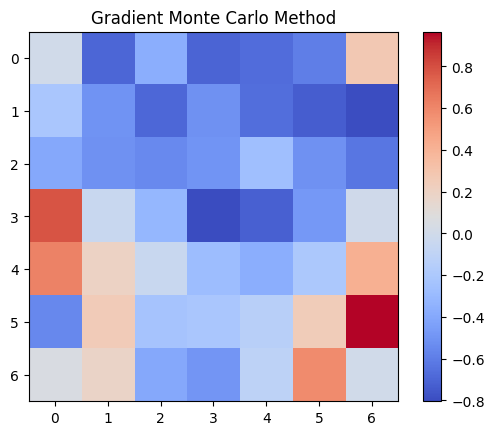

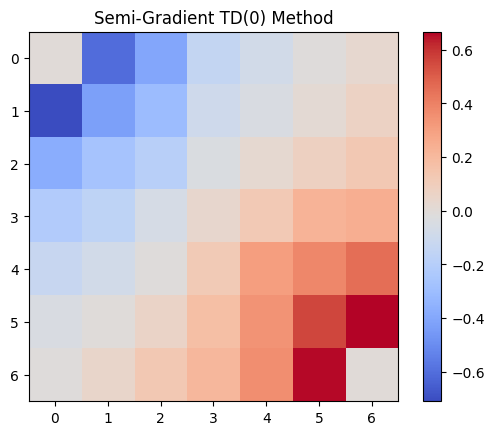

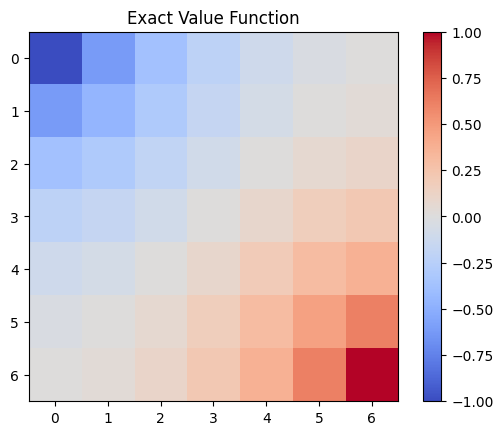

In [39]:
# PART 2

import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
grid_size = (7, 7)
start_state = (grid_size[0] // 2, grid_size[1] // 2)
terminal_states = [(0, 0), (grid_size[0] - 1, grid_size[1] - 1)]
rewards = np.zeros(grid_size)
rewards[0, 0] = -1
rewards[-1, -1] = 1
gamma = 1.0  # Discount factor
alpha = 0.1  # Learning rate

# Step function for random walk
def step(state, action):
    x, y = state
    if action == 'up':
        next_state = (max(x - 1, 0), y)
    elif action == 'down':
        next_state = (min(x + 1, grid_size[0] - 1), y)
    elif action == 'left':
        next_state = (x, max(y - 1, 0))
    elif action == 'right':
        next_state = (x, min(y + 1, grid_size[1] - 1))
    return next_state

# Initialize value functions
V_mc = np.zeros(grid_size)  # For Gradient Monte Carlo Method
V_td = np.zeros(grid_size)  # For Semi-Gradient TD(0)
V_exact = np.zeros(grid_size)  # Exact value function

# Gradient Monte Carlo Method
def gradient_monte_carlo(V, episodes=5000):
    for _ in range(episodes):
        state = start_state
        trajectory = []
        while state not in terminal_states:
            trajectory.append(state)
            action = np.random.choice(['up', 'down', 'left', 'right'])
            next_state = step(state, action)
            state = next_state
        G = rewards[state]
        for state in trajectory:
            V[state] += alpha * (G - V[state])
    return V



# Semi-Gradient TD(0) Method
def semi_gradient_td(V, episodes=5000):
    for _ in range(episodes):
        state = start_state
        while state not in terminal_states:
            action = np.random.choice(['up', 'down', 'left', 'right'])
            next_state = step(state, action)
            reward = rewards[next_state]
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])
            state = next_state
    return V



# Compute exact value function
def compute_exact_value_function():
    A = np.zeros((grid_size[0] * grid_size[1], grid_size[0] * grid_size[1]))
    b = np.zeros(grid_size[0] * grid_size[1])
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            state_index = i * grid_size[1] + j
            if (i, j) in terminal_states:
                A[state_index, state_index] = 1.0
                b[state_index] = rewards[i, j]
            else:
                A[state_index, state_index] = 1.0
                for action in ['up', 'down', 'left', 'right']:
                    next_state = step((i, j), action)
                    next_state_index = next_state[0] * grid_size[1] + next_state[1]
                    A[state_index, next_state_index] -= gamma / 4.0
    V_flat = np.linalg.solve(A, b)
    return V_flat.reshape(grid_size)



# Compute the value functions
V_mc = gradient_monte_carlo(np.copy(V_mc))
V_td = semi_gradient_td(np.copy(V_td))
V_exact = compute_exact_value_function()

# Print the value functions
print("Value Function using Gradient Monte Carlo Method:")
print(V_mc)
print("\nValue Function using Semi-Gradient TD(0) Method:")
print(V_td)
print("\nExact Value Function:")
print(V_exact)

# Plotting the value functions
def plot_value_function(V, title):
    plt.imshow(V, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.show()

plot_value_function(V_mc, 'Gradient Monte Carlo Method')
plot_value_function(V_td, 'Semi-Gradient TD(0) Method')
plot_value_function(V_exact, 'Exact Value Function')